In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [3]:
from lightautoml.automl.presets.text_presets import TabularNLPAutoML
from lightautoml.tasks import Task

from lightautoml.addons.interpretation import LimeTextExplainer

C:\Users\Admin\.conda\envs\oldervenv\Lib\site-packages\lightautoml\transformers\text.py:22: UserWarning: 'gensim' - package isn't installed
  warnings.warn("'gensim' - package isn't installed")
C:\Users\Admin\.conda\envs\oldervenv\Lib\site-packages\lightautoml\addons\interpretation\l2x.py:23: UserWarning: 'gensim' - package isn't installed
  warnings.warn("'gensim' - package isn't installed")


In [4]:
import torch

In [5]:
torch.cuda.is_available()

True

In [6]:
from transformers import logging

logging.set_verbosity_error()

In [7]:
np.random.seed(42)

In [8]:
articles = pd.read_json('data/articles/train.json')
articles.drop_duplicates(subset=['text'], inplace=True)
articles.set_index('id', inplace=True)
articles.sample(10)

,text,sentiment
id,,
3225,Кирилл Жданов\nОткрытие заводов по утилизации ...,positive
4365,Почти во всех случаях обходилось без пострадав...,neutral
5406,"25.11.2016, 12:14\nЕАБР предоставит банку ""Цен...",neutral
3485,Отравление двухлетней девочки в Актау не связа...,neutral
5401,По состоянию на 10 января 2017 года в области ...,neutral
3239,Суд № 2 Алматинского района Астаны принял реше...,negative
4383,Национальный банк РК намерен обратиться в прав...,neutral
5263,Пересмотр — при наличии правовых оснований \n\...,neutral
8492,АСТАНА. КАЗИНФОРМ - Согласно дорожной карте ме...,neutral


In [9]:
full_counts = articles.groupby('sentiment').agg(count = ('sentiment', 'count'))
full_counts

,count
sentiment,
negative,1381
neutral,3893
positive,2675


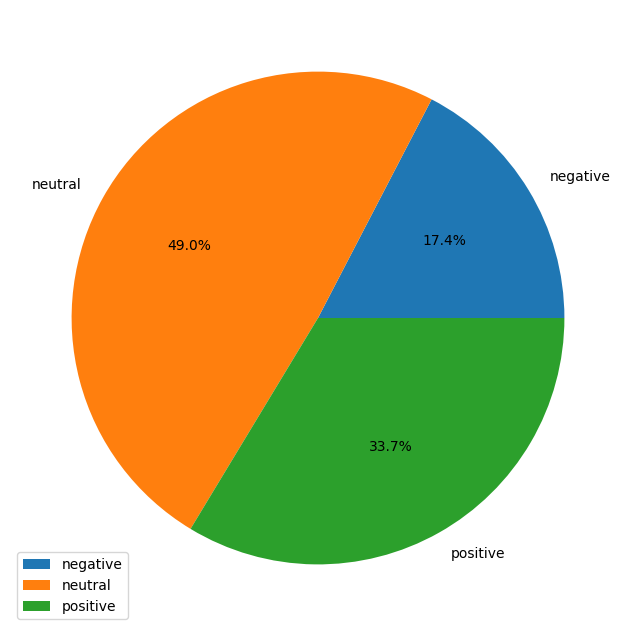

In [10]:
full_counts.plot.pie(figsize=(8, 8), subplots=True, autopct='%1.1f%%')
plt.ylabel('')
plt.legend(loc='lower left')
plt.show()

In [11]:
sentiment_map = {
    'negative': 0,
    'neutral': 1,
    'positive': 2
}

In [12]:
articles.sentiment = articles.sentiment.apply(lambda x: sentiment_map[x])
articles.sample(10)

,text,sentiment
id,,
8360,Министр национальной экономики Тимур Сулеймено...,1
7634,Комитет национальной безопасности РК подозрева...,1
3726,"АСТАНА, 1 ноября. /Корр. ТАСС Светлана Тумаков...",1
5290,\nВ Министерстве по делам религий и гражданско...,1
2249,"\n«Ожидается, что в рамках проекта по утилизац...",2
3118,Общий инвестиционный убыток ЕНПФ в декабре про...,1
8508,Отравление двухлетней девочки в Актау не связа...,1
9057,\nРезультирующее влияние ключевых внешних факт...,1
7274,Адвокат главы ЕНПФ Руслана Ерденаева и начальн...,0


In [13]:
train, test = train_test_split(articles, test_size=0.2, random_state=42)

In [14]:
roles = {
    'text': ['text'],
    'target': 'sentiment'
}

In [15]:
task = Task('multiclass', loss='f1')

In [16]:
automl = TabularNLPAutoML(
    task=task,
    gpu_ids='0',
    general_params={
        'nested_cv': False,
        'use_algos': [['nn', 'linear_l2', 'lgb']]
    },
    text_params={
        'lang': 'ru'
    },
    timeout=3600,
    cpu_limit=4,
    reader_params={
        'random_state': 42
    },
    nn_params={
        'opt_params': {'lr': 1e-5},
        'max_length': 128,
        'bs': 32,
        'n_epochs': 7,
    }
)

In [17]:
roles

{'text': ['text'], 'target': 'sentiment'}

In [18]:
%%time
oof_predict = automl.fit_predict(train, roles=roles, verbose=10)

[14:53:41] Stdout logging level is DEBUG.
[14:53:41] Model language mode: ru
[14:53:41] Task: multiclass

[14:53:41] Start automl preset with listed constraints:
[14:53:41] - time: 3600.00 seconds
[14:53:41] - CPU: 4 cores
[14:53:41] - memory: 16 GB

[14:53:41] Train data shape: (6359, 2)

[14:53:41] Layer 1 train process start. Time left 3599.98 secs
[14:54:05] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[14:54:05] Training params: {'tol': 1e-06, 'max_iter': 100, 'cs': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000], 'early_stopping': 2, 'categorical_idx': [], 'embed_sizes': (), 'data_size': 100}
[14:54:05] ===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[14:54:07] Linear model: C = 1e-05 score = -5.392030468185371
[14:54:07] Linear model: C = 5e-05 score = -5.392030468185371
[14:54:07] Linear model: C = 0.0001 score = -5.392030468185371
[14:54:07] ===== Start working with fold 1 for L

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]C:\Users\Admin\.conda\envs\oldervenv\Lib\site-packages\transformers\models\bert\modeling_bert.py:435: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(
100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:15<00:00,  3.76s/it]


[14:55:27] Feature concated__text transformed
[14:55:27] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
[14:55:27] Training params: {'task': 'train', 'learning_rate': 0.01, 'num_leaves': 32, 'feature_fraction': 0.7, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'max_depth': -1, 'verbosity': -1, 'reg_alpha': 0.5, 'reg_lambda': 0.0, 'min_split_gain': 0.0, 'zero_as_missing': False, 'num_threads': 4, 'max_bin': 255, 'min_data_in_bin': 3, 'num_trees': 3000, 'early_stopping_rounds': 200, 'random_state': 42}
[14:55:27] ===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
[14:55:28] Training until validation scores don't improve for 200 rounds
[14:55:36] [100]	valid's multi_logloss: 0.0634426
[14:55:41] [200]	valid's multi_logloss: -0.688644
[14:55:43] [300]	valid's multi_logloss: -1.08469
[14:55:44] [400]	valid's multi_logloss: -1.35502
[14:55:45] [500]	valid's multi_logloss: -1.56105
[14:55:46] [600]	valid's multi_logloss: -1.73281
[14:55:46] [700]	valid's multi_logloss: -1.880

C:\Users\Admin\.conda\envs\oldervenv\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[14:59:09] Epoch: 0, train loss: -0.4676361083984375, val loss: -0.5013915300369263, val metric: -0.9196711578228483
[15:01:07] Epoch: 1, train loss: -0.5035665035247803, val loss: -0.5075097680091858, val metric: -0.8718536559568473
[15:03:04] Epoch: 2, train loss: -0.5257828831672668, val loss: -0.5147332549095154, val metric: -0.8179419382259158
[15:05:00] Epoch: 3, train loss: -0.5491076111793518, val loss: -0.5120641589164734, val metric: -0.7926713596740125
[15:05:03] ===== Start working with fold 1 for Lvl_0_Pipe_2_Mod_0_TorchNN__linear_layer_0 =====
[15:05:05] Last linear layer not founded, so init_bias=False


C:\Users\Admin\.conda\envs\oldervenv\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[15:07:04] Epoch: 0, train loss: -0.4668887257575989, val loss: -0.4999580979347229, val metric: -0.8974825076592612
[15:08:58] Epoch: 1, train loss: -0.5077371597290039, val loss: -0.5105751752853394, val metric: -0.8504946962853204
[15:10:49] Epoch: 2, train loss: -0.5264902114868164, val loss: -0.5128782391548157, val metric: -0.8289939121148941
[15:12:40] Epoch: 3, train loss: -0.5482926964759827, val loss: -0.5080201625823975, val metric: -0.850916243313708
[15:12:43] ===== Start working with fold 2 for Lvl_0_Pipe_2_Mod_0_TorchNN__linear_layer_0 =====
[15:12:45] Last linear layer not founded, so init_bias=False


C:\Users\Admin\.conda\envs\oldervenv\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[15:14:36] Epoch: 0, train loss: -0.4658328592777252, val loss: -0.5113288760185242, val metric: -0.8516125572756583
[15:16:27] Epoch: 1, train loss: -0.5041620135307312, val loss: -0.513862669467926, val metric: -0.8605462400210266
[15:18:17] Epoch: 2, train loss: -0.5240338444709778, val loss: -0.5115302205085754, val metric: -0.9002872222163845
[15:18:19] Fitting Lvl_0_Pipe_2_Mod_0_TorchNN__linear_layer_0 finished. score = -0.8479500459522702
[15:18:19] Lvl_0_Pipe_2_Mod_0_TorchNN__linear_layer_0 fitting and predicting completed
[15:18:19] Time left 2121.23 secs

[15:18:19] Layer 1 training completed.

[15:18:19] Blending: optimization starts with equal weights and score -0.752515666803781
[15:18:19] Blending: iteration 0: score = -0.7099130000720372, weights = [0.15976918 0.2773664  0.5628644 ]
[15:18:20] Blending: iteration 1: score = -0.7098956687139307, weights = [0.15583974 0.28625026 0.55791   ]
[15:18:20] Blending: iteration 2: score = -0.709895675653124, weights = [0.15594661

In [19]:
test_pred = automl.predict(test)
test_pred

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:36<00:00,  7.22s/it]


[15:19:04] Feature concated__text transformed
[15:19:07] Last linear layer not founded, so init_bias=False


C:\Users\Admin\.conda\envs\oldervenv\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[15:19:37] Last linear layer not founded, so init_bias=False


C:\Users\Admin\.conda\envs\oldervenv\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[15:20:08] Last linear layer not founded, so init_bias=False


C:\Users\Admin\.conda\envs\oldervenv\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


array([[0.08144191, 0.4056108 , 0.5129473 ],
       [0.70450854, 0.2367191 , 0.05877233],
       [0.03906991, 0.34120739, 0.61972284],
       ...,
       [0.11621585, 0.80239284, 0.08139141],
       [0.07361812, 0.30763164, 0.61875033],
       [0.09449469, 0.86721945, 0.03828591]], dtype=float32)

In [20]:
predictied_labels = np.argmax(test_pred.data, axis=1)
predictied_labels

array([2, 0, 2, ..., 1, 2, 1], dtype=int64)

In [21]:
accuracy_score(predictied_labels, test['sentiment'])

0.6855345911949685

In [22]:
f1_score(test['sentiment'], predictied_labels, average='macro')

0.681299714243064

In [23]:
lime = LimeTextExplainer(automl, feature_selection='lasso', force_order=False)

In [24]:
exp = lime.explain_instance(test.iloc[316], labels=(0, 1, 2), perturb_column='text')
exp.visualize_in_notebook(1)

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:58<00:00,  3.67s/it]


[15:21:48] Feature concated__text transformed
[15:21:54] Last linear layer not founded, so init_bias=False


C:\Users\Admin\.conda\envs\oldervenv\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[15:22:37] Last linear layer not founded, so init_bias=False


C:\Users\Admin\.conda\envs\oldervenv\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[15:23:24] Last linear layer not founded, so init_bias=False


C:\Users\Admin\.conda\envs\oldervenv\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Text
 
 
 
12 ноября в ходе строительства вторых путей на участке Алматы-Шу проводились технологические «окна» с остановкой движения поездов, которая явилась вынужденной мерой, сообщила пресс-служба АО «НК «Қазақстан темір жолы» (КТЖ), передает КазТАГ.
«На данном участке (Алматы-Шу – КазТАГ) производились реконструкция горловин станций и стыковка новых магистральных путей с существующими станционными путями, что явилось причиной приостановки движения поездов в целях обеспечения безопасности», - говорится в сообщении на сайте КТЖ в воскресенье.
Как отмечается, после технологических «окон» участок работает стабильно.
«Линия Алматы-Шу - одна из самых напряженных, по ней ежедневно курсирует до 52 пассажирских и 40 грузовых поездов. С вводом в эксплуатацию вторых путей пропускная способность участка увеличится в 3 раза», - утверждают в компании.
«В настоящее время все поезда идут по расписанию. Пассажиры опоздавших поездов могут получить компенсацию в соответствии с законом РК «О железнодорожном транспорте» и правилами перевозок пассажиров, багажа и грузобагажа железнодорожным транспортом РК. За задержку отправления или опоздания с прибытием пассажир может получить 3% от стоимости билета за каждый час ожидания», - пообещали в КТЖ.
Ранее казахстанские СМИ сообщили о толпах пассажиров, переполнивших железнодорожный вокзал Алматы-1 в минувшую субботу, и несвоевременном получении информации о задержке поездов.
 


 алматы шу проводились технологические окна остановкой движения поездов которая явилась вынужденной мерой сообщила пресс служба АО НК аза стан тем жолы КТЖ передает казтаг на данном участке алматы шу казтаг производились реконструкция горловин станций стыковка новых магистральных путей существующими станционными путями что явилось причиной приостановки движения поездов целях обеспечения безопасности говорится сообщении на сайте КТЖ воскресенье как отмечается после технологических окон участок работает стабильно линия алматы шу одна из самых напряженных по ней ежедневно курсирует до пассажирских грузовых поездов вводом эксплуатацию вторых путей пропускная способность участка увеличится раза утверждают компании настоящее время все поезда идут по расписанию пассажиры опоздавших поездов могут получить компенсацию соответствии законом РК железнодорожном транспорте правилами перевозок пассажиров багажа грузобагажа железнодорожным транспортом РК за задержку отправления или опоздания прибытием пассажир может получить от стоимости билета за каждый час ожидания пообещали КТЖ ранее казахстанские СМИ сообщили толпах пассажиров переполнивших железнодорожный вокзал алматы минувшую субботу несвоевременном получении информации задержке поездов 
 
 
 
 Class mapping
 
 
 
 
 Other classes
 
 Class: 1
 
 
 

 
 -3.4 -2.7 -2.0 -1.4 -0.7 0.0 0.7 1.4 2.0 2.7 3.4

In [25]:
test.iloc[316]

text         \n12 ноября в ходе строительства вторых путей ...
sentiment                                                    1
Name: 3502, dtype: object

In [26]:
predictied_labels[316]

1

In [27]:
articles_test = pd.read_json('data/articles/test.json')
articles_test['sentiment'] = pd.Series([0] * len(articles_test), dtype=int)
articles_test.head(10)

,text,id,sentiment
0,"Как сообщает пресс-служба акимата Алматы, для ...",0,0
1,Казахстанские авиакомпании перевозят 250 тысяч...,1,0
2,На состоявшемся под председательством Касым-Жо...,2,0
3,В ОАЭ состоялись переговоры между казахстанско...,3,0
4,12 вагонов грузового поезда сошли с путей в Во...,4,0
5,Отправившиеся на «джихад» из города Сатпаева К...,5,0
6,\nНазарбаев утвердил новый состав правительств...,6,0
7,ШЫМКЕНТ. КАЗИНФОРМ - В Шардаринском районе Южн...,7,0
8,С 5 августа 2011 года вступил в юридическую с...,8,0
9,Казахстанцы должны платить за коммунальные усл...,9,0


In [28]:
predictions = automl.predict(articles_test)
labels = np.argmax(predictions.data, axis=1)
labels

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:42<00:00,  6.03s/it]


[15:25:08] Feature concated__text transformed
[15:25:13] Last linear layer not founded, so init_bias=False


C:\Users\Admin\.conda\envs\oldervenv\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[15:25:52] Last linear layer not founded, so init_bias=False


C:\Users\Admin\.conda\envs\oldervenv\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[15:26:23] Last linear layer not founded, so init_bias=False


C:\Users\Admin\.conda\envs\oldervenv\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


array([1, 2, 1, ..., 1, 1, 1], dtype=int64)

In [29]:
assert len(labels) == articles_test.shape[0]
print("OK!")

OK!


In [30]:
articles_test['sentiment'] = labels
articles_test.sample(10)

,text,id,sentiment
184,Обзор розничных вкладов. ТОП-10 БВУ по наращив...,184,2
1724,Активная работа по рассмотрению и решению вопр...,1725,1
251,"Старики, проживающие в медико-социальных учреж...",251,1
1121,\nЗа 2016 год скорость поездов с вагонами «Тал...,1122,2
1486,конкуренции Министерства национальной экономик...,1487,1
111,"Астана. 23 января. Kazakhstan Today - АО ""ЕНПФ...",111,1
1450,Под таким лозунгом фондом «Samruk-Kazyna Trust...,1451,2
188,Фото с сайта 365info.kz\nНа утилизации зарабат...,188,1
614,"КРЫМский бандеровец, блогер \n\n1. Сегодня ФСБ...",615,0
220,Олимпийские чемпионы Ермахан Ибраимов и Валери...,220,2


In [31]:
articles_test['sentiment'] = articles_test['sentiment']\
    .map({v: k for k, v in sentiment_map.items()})
articles_test.sample(10)

,text,id,sentiment
599,Регулятор простимулирует население к сбережени...,600,neutral
752,"Общая сумма, которую пострадавшие хотят взыска...",753,negative
2017,Автопарк выплатит более полумиллиона тенге уще...,2029,negative
1001,Аэропорты Астаны и Алматы в десятке крупнейших...,1002,positive
329,\n\nТерритория между 27 и 16 микрорайонами п...,329,neutral
483,Цены на водоснабжение и водоотведение останутс...,483,neutral
682,\nСеверный морской порт Актау был введен в экс...,683,positive
325,"У нас образованный, впитавший в себя историчес...",325,neutral
166,"В Алматы стартовала Эстафета огня, посвященная...",166,neutral
1034,Вода в реке Акбулак не вредна для жителей Аста...,1035,neutral


In [32]:
articles_test[['id', 'sentiment']].to_csv('output.csv', index=False)

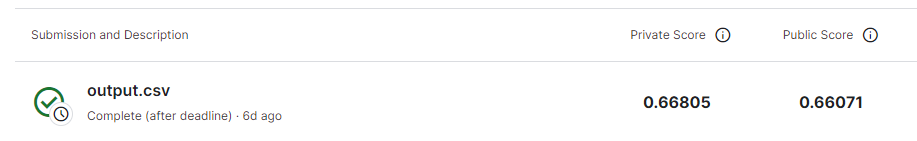

## Сохранение модели

In [33]:
import pickle

with open('models/large_text_lama_classifier.pkl', 'wb') as f:
    pickle.dump(automl, f)

## Загрузка и повторное тестирование модели

In [34]:
with open('models/large_text_lama_classifier.pkl', 'rb') as f:
    loaded_automl = pickle.load(f)

In [35]:
%%time
test_pred = automl.predict(test)
test_pred

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:40<00:00,  8.12s/it]


[15:33:30] Feature concated__text transformed
[15:33:35] Last linear layer not founded, so init_bias=False


C:\Users\Admin\.conda\envs\oldervenv\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[15:35:37] Last linear layer not founded, so init_bias=False


C:\Users\Admin\.conda\envs\oldervenv\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[15:36:11] Last linear layer not founded, so init_bias=False


C:\Users\Admin\.conda\envs\oldervenv\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


CPU times: total: 2min 27s
Wall time: 4min 12s


array([[0.08144191, 0.4056108 , 0.5129473 ],
       [0.70450854, 0.2367191 , 0.05877233],
       [0.03906991, 0.34120739, 0.61972284],
       ...,
       [0.11621585, 0.80239284, 0.08139141],
       [0.07361812, 0.30763164, 0.61875033],
       [0.09449469, 0.86721945, 0.03828591]], dtype=float32)

In [36]:
predictied_labels = np.argmax(test_pred.data, axis=1)
predictied_labels

array([2, 0, 2, ..., 1, 2, 1], dtype=int64)

In [37]:
accuracy_score(predictied_labels, test['sentiment'])

0.6855345911949685

In [38]:
f1_score(test['sentiment'], predictied_labels, average='macro')

0.681299714243064